# Final Capstone Project : IBM Adbvanced Data Science
#### Author: Walid Benaziza

In [1]:
#Install the depedencies 

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [40]:
#Load the Data
#from google.colab import files
#uploded = files.upload()

Saving NFLX.csv to NFLX (2).csv


In [4]:
df = pd.read_csv('NFLX.csv')
print(df.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2015-12-16  119.800003  123.000000  118.089996  122.639999  122.639999   
1  2015-12-17  123.970001  126.349998  122.419998  122.510002  122.510002   
2  2015-12-18  120.849998  122.190002  117.919998  118.019997  118.019997   
3  2015-12-21  119.510002  119.589996  115.660004  116.629997  116.629997   
4  2015-12-22  117.300003  117.430000  114.860001  116.239998  116.239998   

     Volume  
0  13181000  
1  17284900  
2  17948100  
3  11670000  
4   9689000  


In [5]:
 #Get the shape of Dataset
print(df.shape)

(1007, 7)


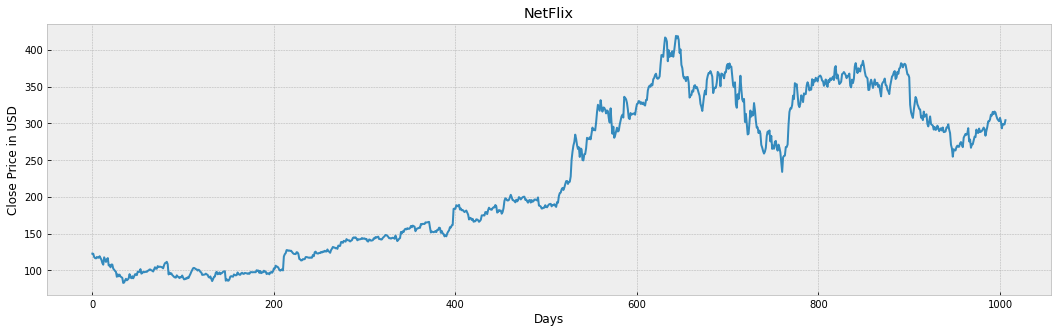

In [6]:
#Viulasie the close price
plt.figure(figsize=(18,5)) 
plt.title("NetFlix")
plt.xlabel('Days')
plt.ylabel('Close Price in USD')
plt.plot(df['Close'])
plt.show()

In [7]:
#Get the Close Price
df = df[['Close']]
df.head(4)

,Close
0,122.639999
1,122.510002
2,118.019997
3,116.629997


In [8]:
#Craete a variable to predict the 'X' days out into future
future_days = 25
#Create a new Column (target) shifted 'X units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.head(4)

,Close,Prediction
0,122.639999,99.120003
1,122.510002,97.830002
2,118.019997,91.150002
3,116.629997,94.410004


In [9]:
#Craete the feature dataset (x) and cnvert it to numpy  array
x = np.array(df.drop(['Prediction'],1))[:-future_days]
print(x[:10])

[[122.639999]
 [122.510002]
 [118.019997]
 [116.629997]
 [116.239998]
 [118.160004]
 [117.330002]
 [117.110001]
 [119.120003]
 [116.709999]]


C:\Users\bendi\AppData\Local\Temp/ipykernel_11156/2084643273.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(df.drop(['Prediction'],1))[:-future_days]


In [10]:
#Craete the target Data Set (y) and convert into numpy array and get all target values except last 'X' rows/days

y = np.array(df['Prediction'])[:-future_days]
print(y)

[ 99.120003  97.830002  91.150002  94.410004  91.839996  94.089996
  91.489998  90.739998  89.709999  82.790001  83.32      86.129997
  88.449997  86.349998  87.400002  89.050003  94.760002  90.489998
  89.230003  91.93      89.120003  91.610001  94.529999  94.790001
  93.410004  98.300003  97.610001  97.93     101.580002  95.489998
  96.230003  98.        97.360001  97.660004  98.129997  97.860001
  99.349998  99.720001 101.120003 101.059998  99.839996  99.589996
  98.360001 101.209999 104.129997 102.190002 102.230003 105.699997
 104.349998 104.940002 104.830002 104.449997 103.809998 102.68
 106.980003 109.650002 110.419998 111.510002 108.400002  94.339996
  96.769997  94.980003  95.900002  93.559998  92.43      91.040001
  90.279999  90.029999  93.110001  91.540001  90.790001  89.370003
  90.839996  90.540001  92.889999  90.019997  87.739998  87.879997
  89.120003  88.629997  90.5       89.550003  92.489998  94.889999
  97.889999 100.199997 102.809998 103.300003 102.57     101.510002

In [11]:
#Splits the data into 75% training and  75% testing
x_train,x_test,y_train ,y_test = train_test_split(x,y,test_size = 0.25)

In [12]:
#Create a models
#Create a descison tree regressor model
tree = DecisionTreeRegressor().fit(x_train,y_train)
#Create a Linear Regression mmodel
lr = LinearRegression().fit(x_train,y_train)

In [17]:
#Get the last rows of feature data set
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future[:5]

C:\Users\bendi\AppData\Local\Temp/ipykernel_11156/317319118.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = df.drop(['Prediction'],1)[:-future_days]


array([[274.459991],
       [270.720001],
       [267.529999],
       [280.480011],
       [282.929993]])

In [14]:
#Show the model tree Prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regrssion prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[294.179993 292.01001  283.109985 289.619995 332.940002 302.570007
 302.600006 253.669998 280.480011 310.480011 295.350006 312.48999
 315.929993 314.660004 309.98999  306.160004 304.320007 302.859985
 307.350006 302.5      293.119995 284.25     298.440002 270.720001
 304.209991]

[277.84193124 274.25041008 271.18704368 283.62297056 285.97569402
 288.47248587 287.24329983 289.19271263 295.98205692 278.64858233
 281.28941378 270.3803926  274.77856485 274.99944495 280.10826014
 284.94816283 284.32397207 294.15748823 290.27785908 289.70167191
 295.51148861 290.87324173 291.41100816 292.35211503 294.27271971]


C:\Users\bendi\AppData\Local\Temp/ipykernel_11156/3125126334.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = Prediction


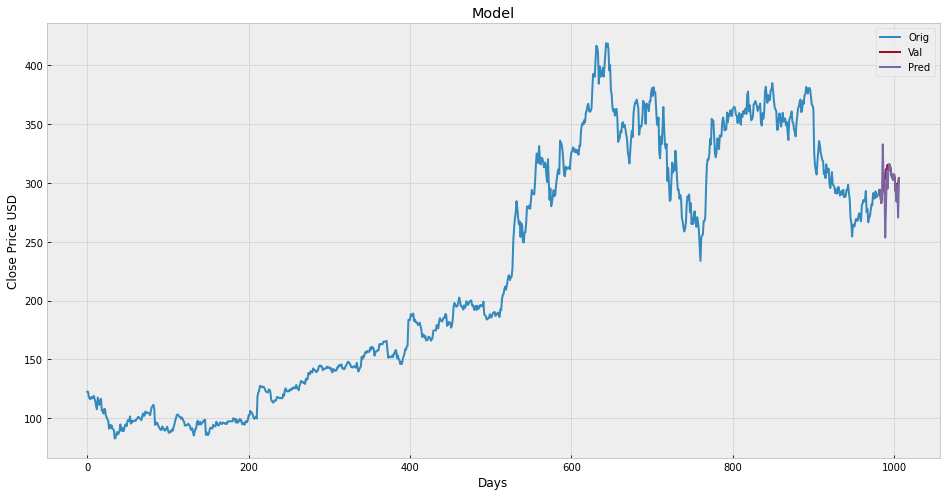

In [15]:
#Visualize the data
Prediction = tree_prediction

valid = df[x.shape[0]:]
valid['Prediction'] = Prediction

plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Close Price USD")
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Orig','Val','Pred'])

C:\Users\bendi\AppData\Local\Temp/ipykernel_11156/145365143.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = Prediction


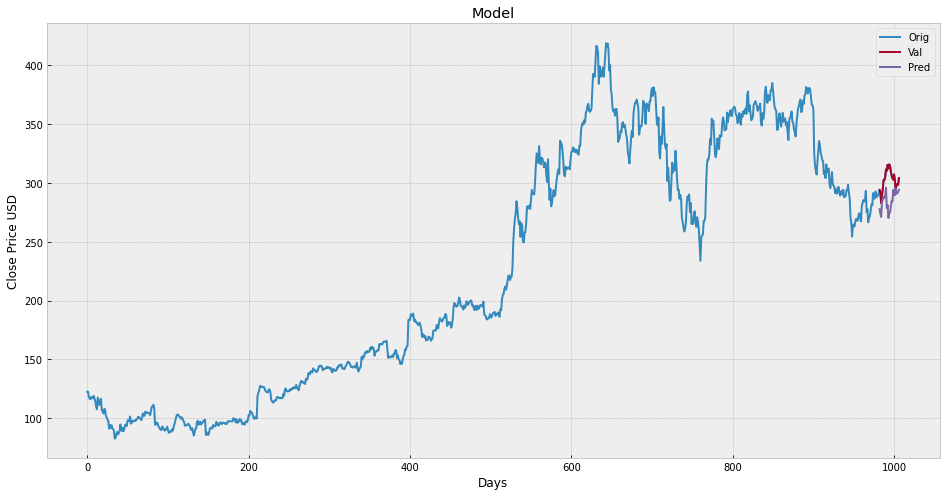

In [16]:
#Visualize the data
Prediction = lr_prediction

valid = df[x.shape[0]:]
valid['Prediction'] = Prediction

plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Close Price USD")
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Orig','Val','Pred'])